# Machine Learning basics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)

## Linear Regression
Consider a dataset with $n$ observations (rows) and $k$ features (columns), and we want to run a linear regression model as below:

$$
Y = \alpha + \beta X +\epsilon 
$$
\
$$
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix} =
\begin{pmatrix}
\alpha \\
\alpha \\
\vdots \\
\alpha
\end{pmatrix} + 
\begin{pmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_k
\end{pmatrix} 
\begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1k} \\
x_{21} & x_{22} & \cdots & x_{2k} \\
\vdots &\vdots & & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nk} \\
\end{pmatrix} +
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{pmatrix} 
$$

which is equivalent to:
$$
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix} =
\begin{pmatrix}
\alpha \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_k
\end{pmatrix} 
\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1k} \\
1 & x_{21} & x_{22} & \cdots & x_{2k} \\
\vdots & \vdots & \vdots & & \vdots \\
1 & x_{n1} & x_{n2} & \cdots & x_{nk} \\
\end{pmatrix} +
\begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_n
\end{pmatrix} 
$$
$$
Y = \beta X +\epsilon 
$$

$$
\beta = (X^TX)^{-1}X^TY
$$

In [131]:
import wrds
WRDS_LOGIN = 'guy006' 
db = wrds.Connection(wrds_username=WRDS_LOGIN)

Loading library list...
Done


In [132]:
googleC_permno = 14542
query = f"SELECT * FROM crsp.wrds_dsfv2_query WHERE permno = {googleC_permno}"
google = db.raw_sql(query, date_cols='dlycaldt')
google = google.set_index(['ticker','dlycaldt']).sort_values(['ticker','dlycaldt'])

In [134]:
# get change of volume
pd.set_option('display.max_columns', None)
google['chgrtn_vol'] = google['dlyvol'].diff(1) / google['dlyvol'].shift(1)
df_google = google[['dlyret', 'chgrtn_vol', 'sprtrn']].copy()
df_google

dlyret  chgrtn_vol    sprtrn
ticker dlycaldt                                  
GOOG   2014-04-03       NaN         NaN -0.001126
       2014-04-04 -0.046688    0.253473 -0.012537
       2014-04-07 -0.009187   -0.311744 -0.010750
       2014-04-08  0.031125   -0.281855  0.003751
       2014-04-09  0.016652    0.054664  0.010918
...                     ...         ...       ...
       2023-12-22  0.006488    0.021288  0.001660
       2023-12-26  0.000701   -0.397400  0.004232
       2023-12-27 -0.009663    0.550415  0.001430
       2023-12-28 -0.001131   -0.293601  0.000370
       2023-12-29 -0.002477    0.224874 -0.002826

[2453 rows x 3 columns]

In [135]:
# drop missing values
df_google = df_google.dropna()
df_google

dlyret  chgrtn_vol    sprtrn
ticker dlycaldt                                  
GOOG   2014-04-04 -0.046688    0.253473 -0.012537
       2014-04-07 -0.009187   -0.311744 -0.010750
       2014-04-08  0.031125   -0.281855  0.003751
       2014-04-09  0.016652    0.054664  0.010918
       2014-04-10 -0.041107    0.213551 -0.020885
...                     ...         ...       ...
       2023-12-22  0.006488    0.021288  0.001660
       2023-12-26  0.000701   -0.397400  0.004232
       2023-12-27 -0.009663    0.550415  0.001430
       2023-12-28 -0.001131   -0.293601  0.000370
       2023-12-29 -0.002477    0.224874 -0.002826

[2452 rows x 3 columns]

### Matrix Operation:

In [136]:
Y = df_google['dlyret'].values
X = df_google[['chgrtn_vol', 'sprtrn']].values

In [137]:
print(X.shape)
X

(2452, 2)


array([[ 2.53472819e-01, -1.25370000e-02],
       [-3.11743821e-01, -1.07500000e-02],
       [-2.81854964e-01,  3.75100000e-03],
       ...,
       [ 5.50414714e-01,  1.43000000e-03],
       [-2.93601067e-01,  3.70000000e-04],
       [ 2.24873897e-01, -2.82600000e-03]])

In [138]:
# add constant:
cons = np.ones(X.shape[0]).reshape(X.shape[0],1)
Xc  = np.hstack( (cons, X) )
Xc

array([[ 1.00000000e+00,  2.53472819e-01, -1.25370000e-02],
       [ 1.00000000e+00, -3.11743821e-01, -1.07500000e-02],
       [ 1.00000000e+00, -2.81854964e-01,  3.75100000e-03],
       ...,
       [ 1.00000000e+00,  5.50414714e-01,  1.43000000e-03],
       [ 1.00000000e+00, -2.93601067e-01,  3.70000000e-04],
       [ 1.00000000e+00,  2.24873897e-01, -2.82600000e-03]])

$$
\beta = (X^TX)^{-1}X^TY
$$

In [139]:
beta = np.linalg.inv(Xc.T @ Xc) @ Xc.T @ Y
beta

array([ 3.12378871e-04, -1.28071611e-04,  1.14509662e+00])

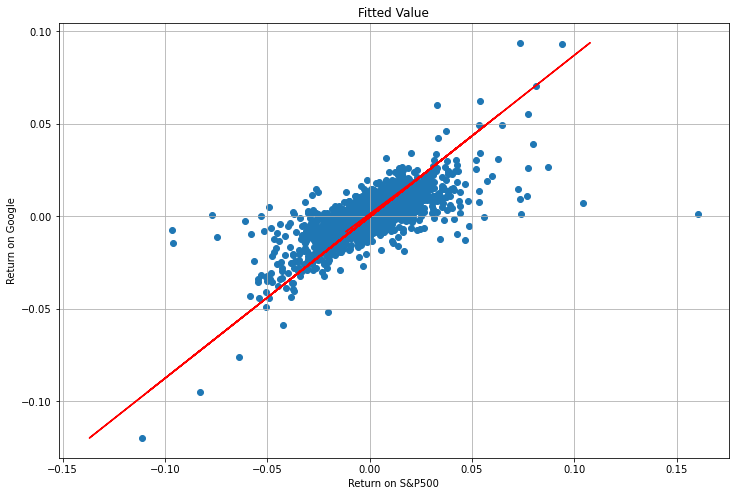

In [140]:
# Prediction:

Y_hat = beta @ Xc.T

fig, ax1 = plt.subplots(figsize=(12,8))
ax1.scatter(Y, Xc[:,2], marker='o')
ax1.plot(Y_hat, Xc[:,2], color = 'r')
ax1.set_ylabel('Return on Google')
ax1.set_xlabel('Return on S&P500')
plt.title('Fitted Value')
plt.grid(True)

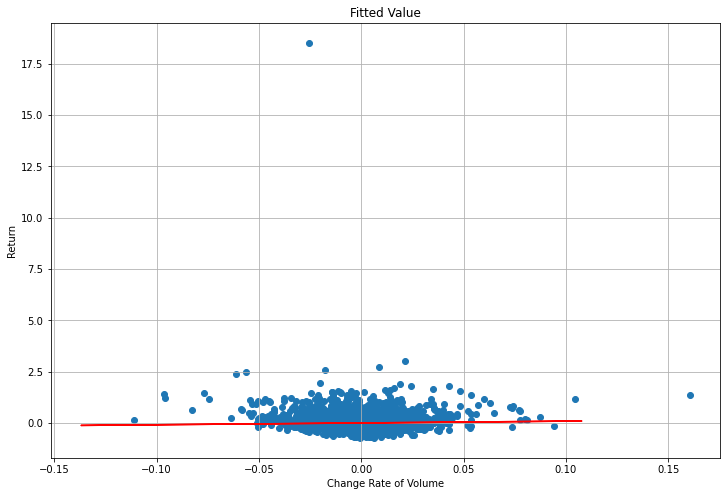

In [141]:
# Prediction:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.scatter(Y, Xc[:,1], marker='o')
ax1.plot(Y_hat, Xc[:,2], color = 'r')
ax1.set_ylabel('Return')
ax1.set_xlabel('Change Rate of Volume')
plt.title('Fitted Value')
plt.grid(True)

In [143]:
# Covariance
residual = (Y - Y_hat)
residual_sum_of_square = (residual ** 2).sum()
sigma_square_hat = residual_sum_of_square / (Xc.shape[0] - Xc.shape[1])
var_beta = (np.linalg.inv(Xc.T @ Xc) * sigma_square_hat) 
var_beta

array([[ 6.09903581e-08, -1.42803205e-08, -2.74267716e-07],
       [-1.42803205e-08,  2.10644824e-07,  9.63552525e-07],
       [-2.74267716e-07,  9.63552525e-07,  4.77695115e-04]])

In [144]:
# Standard Deviation
std = [var_beta[i, i] ** 0.5 for i in range(len(var_beta))]
std

[0.00024696226047415276, 0.00045896059108894457, 0.02185623744281364]

### Statsmodels
The same model with Statsmodels module

In [145]:
import statsmodels.api as sm

In [146]:
X

array([[ 2.53472819e-01, -1.25370000e-02],
       [-3.11743821e-01, -1.07500000e-02],
       [-2.81854964e-01,  3.75100000e-03],
       ...,
       [ 5.50414714e-01,  1.43000000e-03],
       [-2.93601067e-01,  3.70000000e-04],
       [ 2.24873897e-01, -2.82600000e-03]])

In [147]:
Xs = sm.add_constant(X)
Xs

array([[ 1.00000000e+00,  2.53472819e-01, -1.25370000e-02],
       [ 1.00000000e+00, -3.11743821e-01, -1.07500000e-02],
       [ 1.00000000e+00, -2.81854964e-01,  3.75100000e-03],
       ...,
       [ 1.00000000e+00,  5.50414714e-01,  1.43000000e-03],
       [ 1.00000000e+00, -2.93601067e-01,  3.70000000e-04],
       [ 1.00000000e+00,  2.24873897e-01, -2.82600000e-03]])

In [148]:
lr = sm.OLS(Y, Xs).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     1387.
Date:                Sun, 15 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:44:44   Log-Likelihood:                 7342.2
No. Observations:                2452   AIC:                        -1.468e+04
Df Residuals:                    2449   BIC:                        -1.466e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.265      0.206      -0.000       0.001
x1            -0.0001      0.000     -0.279      0.780      -0.001       0.001
x2             1.1451      0.022     52.392      0.000       1.102       1.188
==============================================================================
Omnibus:                      913.108   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38642.038
Skew:                           1.037   Prob(JB):                         0.00
Kurtosis:                      22.337   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
beta

array([ 3.12378871e-04, -1.28071611e-04,  1.14509662e+00])

### Linearmodels
https://github.com/bashtage/linearmodels/tree/main

In [ ]:
#!pip install linearmodels

In [151]:
x_cols = ["chgrtn_vol", "sprtrn"]
x_vars = sm.add_constant(df_google[x_cols])
mod = PooledOLS(df_google.dlyret, x_vars)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                 dlyret   R-squared:                        0.5311
Estimator:                  PooledOLS   R-squared (Between):              0.0000
No. Observations:                2452   R-squared (Within):               0.5311
Date:                Sun, Sep 15 2024   R-squared (Overall):              0.5311
Time:                        15:44:54   Log-likelihood                    7342.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1386.7
Entities:                           1   P-value                           0.0000
Avg Obs:                       2452.0   Distribution:                  F(2,2449)
Min Obs:                       2452.0                                           
Max Obs:                       2452.0   F-statistic (robust):             1386.7
                            

### Sklearn
Scikit-Learn provides very simple and convenient APIs for training and evaluating popular machine learning models. Here we take linear regression as an example.

In [154]:
from sklearn.linear_model import LinearRegression

In [161]:
linearregress1 = LinearRegression(fit_intercept=True).fit(X, Y)
print(linearregress1.intercept_, linearregress1.coef_)

0.0003123788708769506 [-1.28071611e-04  1.14509662e+00]


In [162]:
linearregress2 = LinearRegression(fit_intercept=False).fit(Xs, Y)
linearregress2.coef_

array([ 3.12378871e-04, -1.28071611e-04,  1.14509662e+00])

In [163]:
beta

array([ 3.12378871e-04, -1.28071611e-04,  1.14509662e+00])

## Classification: Logistic Regression with Panelty
https://compgenomr.github.io/book/logistic-regression-and-regularization.html

+ If $y_i$ can only be 0 or 1, a simple linear regression will result in values that are beyond 0 and 1 boundaries.
+ We can think of $y_i$ as a realization of a random variable that can take the values one and zero with probabilities $p_i$ and $1-p_i$, respectively, which follows the Bernoulli distribution.
+ A model that satisfies the boundary requirement is the logistic equation shown below.

$$
p_i=\frac{e^{\left(\beta_0+\beta_1 x_i\right)}}{1+e^{\left(\beta_0+\beta_1 x_i\right)}}
$$

+ It can be linearized by the following expression:
$$
\operatorname{logit}\left(p_i\right)=\ln \left(\frac{p_i}{1-p_i}\right)=\beta_0+\beta_1 x_i
$$

The maximizatiom log likelihood function is
$$
\ln (L)=\sum_{i=1}^N\left[(1-y_i)\ln \left(1-p_i\right)+y_i \ln \left({p_i}\right)\right]
$$

### Regularization: in order to avoid overfitting
+ If we can limit the flexibility of the model, this might help with performance on the unseen, new data sets, which is called regularization. 
+ By modifying the loss function with a penalty term which effectively shrinks the estimates of the coefficients, We need regularization to introduce bias to the model and to decrease the variance. This can be achieved . 

#### L2 Norm, L2 Penalty: Ridge Regression
$$
L_{l o g}+\lambda \sum_{j=1}^p \beta_j{ }^2
$$

#### L1 Norm, L1 Panalty: LASSO Regression
$$
L_{l o g}+\lambda \sum_{j=1}^p\left|\beta_j\right|
$$

#### Grid Search for optimal hyper-parameter

In [193]:
# generate data
import random
x = np.asarray(random.sample(range(0, 100), 30)).reshape(10, 3)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print("independent variables")
print(x)
print("===================")
print("dependent variables")
print(y)

independent variables
[[20  8 34]
 [35 77 85]
 [92 36 68]
 [72 24 45]
 [ 5 99 76]
 [69 78 31]
 [26 93 63]
 [89 37 50]
 [73 91 11]
 [16  3 48]]
dependent variables
[0 0 0 0 1 1 1 1 1 1]


In [194]:
log_lambdas = np.linspace(-1,10,50)
lambdas = np.exp(log_lambdas)
inverse_lambda = 1/lambdas
inverse_lambda = inverse_lambda.tolist()

In [196]:
param_grid_lr = {
    'penalty' :['l1'], 
    'solver' : ['liblinear'], 
    'C': inverse_lambda,
    'max_iter' : [10000]
}
lr1 = GridSearchCV(estimator = LogisticRegression(), 
                   param_grid = param_grid_lr, 
                   cv = 3,
                   scoring = 'neg_mean_squared_error').fit(x,y)

print("Best Parameters")
print(lr1.best_params_)
print('================')
print(lr1.best_estimator_)

Best Parameters
{'C': 0.05982530598025908, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.05982530598025908, max_iter=10000, penalty='l1',
                   solver='liblinear')


In [197]:
print(lr1.best_estimator_.coef_)
print(lr1.best_params_['C'])

[[-0.00020588  0.02429628 -0.01686654]]
0.05982530598025908


### prediction/classification

In [204]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [205]:
lr1.predict(x)

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [206]:
lr1.predict_proba(x)

array([[0.59464701, 0.40535299],
       [0.39413787, 0.60586213],
       [0.57228986, 0.42771014],
       [0.54753282, 0.45246718],
       [0.24555803, 0.75444197],
       [0.2045589 , 0.7954411 ],
       [0.23297132, 0.76702868],
       [0.49067316, 0.50932684],
       [0.11811535, 0.88188465],
       [0.67699565, 0.32300435]])

# Other methods
https://scikit-learn.org/stable/user_guide.html

+ Random Forest
+ Support Vector Machine
+ Gradient Boosting

In [213]:
x = np.asarray(random.sample(range(0, 900), 900)).reshape(300, 3)
y = np.random.randint(0,2,300)
print("independent variables")
print(x.shape)
print("===================")
print("dependent variable")
print(y.shape)

independent variables
(300, 3)
dependent variable
(300,)


In [215]:
from sklearn.model_selection import train_test_split
# stratify your dataset using classification labels
# train/validation/test=0.7/0.1/0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42, stratify=y_train)
print(y_train.mean(), y_val.mean(), y_test.mean())

0.5761904761904761 0.5666666666666667 0.5666666666666667


In [216]:
# standardized the data
x_mean, x_std = x_train.mean(axis=0), x_train.std(axis=0)
x_train = (x_train - x_mean) / x_std
x_val = (x_val - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)
gb_model = GradientBoostingClassifier()

# training
rf_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)

# training
svm_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)

# get predictions of training set
svm_train_pred = svm_model.predict(x_train)
rf_train_pred = rf_model.predict(x_train)
gb_train_pred = gb_model.predict(x_train)

# get predictions of validation set
svm_val_pred = svm_model.predict(x_val)
rf_val_pred = rf_model.predict(x_val)
gb_val_pred = gb_model.predict(x_val)


In [219]:
from sklearn.metrics import accuracy_score, roc_auc_score

svm_train_acc = accuracy_score(y_train, svm_train_pred)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
gb_train_acc = accuracy_score(y_train, gb_train_pred)

svm_val_acc = accuracy_score(y_val, svm_val_pred)
rf_val_acc = accuracy_score(y_val, rf_val_pred)
gb_val_acc = accuracy_score(y_val, gb_val_pred)

print(f"SVM ACC\ntrain={svm_train_acc:.4f}, val={svm_val_acc:.4f}")
print(f"Random reforest ACC\ntrain={rf_train_acc:.4f}, val={rf_val_acc:.4f}")
print(f"Gradiant boosting ACC\ntrain={gb_train_acc:.4f}, val={gb_val_acc:.4f}")


SVM ACC
train=0.6190, val=0.6000
Random reforest ACC
train=1.0000, val=0.5333
Gradiant boosting ACC
train=0.9905, val=0.5667


In [222]:
# get probabilities of training set
svm_train_prob = svm_model.predict_proba(x_train)[:, 1]
rf_train_prob = rf_model.predict_proba(x_train)[:, 1]
gb_train_prob = gb_model.predict_proba(x_train)[:, 1]

# get probabilities of validation set
svm_val_prob = svm_model.predict_proba(x_val)[:, 1]
rf_val_prob = rf_model.predict_proba(x_val)[:, 1]
gb_val_prob = gb_model.predict_proba(x_val)[:, 1]

svm_train_auc = roc_auc_score(y_train, svm_train_prob)
rf_train_auc = roc_auc_score(y_train, rf_train_prob)
gb_train_auc = roc_auc_score(y_train, gb_train_prob)

svm_val_auc = roc_auc_score(y_val, svm_val_prob)
rf_val_auc = roc_auc_score(y_val, rf_val_prob)
gb_val_auc = roc_auc_score(y_val, gb_val_prob)

print(f"SVM AUC\ntrain={svm_train_auc:.4f}, val={svm_val_auc:.4f}")
print(f"Random reforest AUC\ntrain={rf_train_auc:.4f}, val={rf_val_auc:.4f}")
print(f"Gradiant boosting AUC\ntrain={gb_train_auc:.4f}, val={gb_val_auc:.4f}")


SVM AUC
train=0.6903, val=0.7602
Random reforest AUC
train=1.0000, val=0.4434
Gradiant boosting AUC
train=0.9994, val=0.5520


In [223]:
# get predictions of test set

svm_test_pred = svm_model.predict(x_test)
rf_test_pred = rf_model.predict(x_test)
gb_test_pred = gb_model.predict(x_test)

svm_test_prob = svm_model.predict_proba(x_test)[:, 1]
rf_test_prob = rf_model.predict_proba(x_test)[:, 1]
gb_test_prob = gb_model.predict_proba(x_test)[:, 1]


svm_test_acc = accuracy_score(y_test, svm_test_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
gb_test_acc = accuracy_score(y_test, gb_test_pred)

svm_test_auc = roc_auc_score(y_test, svm_test_prob)
rf_test_auc = roc_auc_score(y_test, rf_test_prob)
gb_test_auc = roc_auc_score(y_test, gb_test_prob)

print("SVM")
print(f"ACC={svm_test_acc:.4f}, AUC={svm_test_auc:.4f}")
print("Random forest")
print(f"ACC={rf_test_acc:.4f}, AUC={rf_test_auc:.4f}")
print("Gradiant boosting")
print(f"ACC={gb_test_acc:.4f}, AUC={gb_test_auc:.4f}")

SVM
ACC=0.5333, AUC=0.5317
Random forest
ACC=0.5500, AUC=0.5622
Gradiant boosting
ACC=0.5667, AUC=0.5656


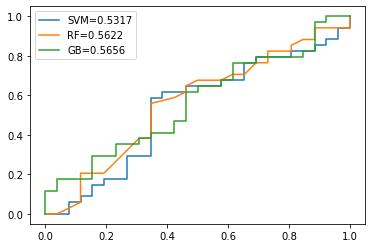

In [224]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, svm_test_prob)
plt.plot(fprs, tprs, label=f"SVM={svm_test_auc:.4f}")
fprs, tprs, thresholds = roc_curve(y_test, rf_test_prob)
plt.plot(fprs, tprs, label=f"RF={rf_test_auc:.4f}")
fprs, tprs, thresholds = roc_curve(y_test, gb_test_prob)
plt.plot(fprs, tprs, label=f"GB={gb_test_auc:.4f}")
plt.legend()
plt.show()

## Principle Component Analysis: PCA

$$
X = \begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1k} \\
x_{21} & x_{22} & \cdots & x_{2k} \\
\vdots &\vdots & & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nk} \\
\end{pmatrix}
$$

https://scikit-learn.org/stable/auto_examples/decomposition/index.html

In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d

In [3]:
iris = datasets.load_iris()
X = iris.data
X = X-X.mean(axis=0)

In [4]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

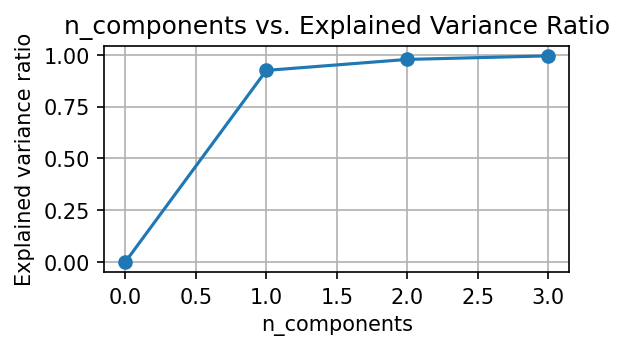

In [5]:
nums = np.arange(4)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(X)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [6]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [7]:
X_new = pca.transform(X)

### by eigenvector

In [16]:
X = iris.data
X = X-X.mean(axis=0)

In [17]:
cov = np.cov(X.T, bias = False)
cov

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [18]:
# The normalized (unit “length”) eigenvectors, 
# such that the column eigenvectors[:,i] is the eigenvector corresponding to the eigenvalue eigenvalues[i]
eigval, eigvector = np.linalg.eig(cov)



In [19]:
eigval

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [20]:
sorted_eigvec = eigvector[:,np.argsort(-eigval)]
sorted_eigvec

array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
       [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
       [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
       [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]])

In [21]:
W = sorted_eigvec[:,0:3]
W

array([[ 0.36138659, -0.65658877, -0.58202985],
       [-0.08452251, -0.73016143,  0.59791083],
       [ 0.85667061,  0.17337266,  0.07623608],
       [ 0.3582892 ,  0.07548102,  0.54583143]])

In [27]:
X_new[0:10, :]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272]])

In [28]:
X@W

array([[-2.68412563, -0.31939725, -0.02791483],
       [-2.71414169,  0.17700123, -0.21046427],
       [-2.88899057,  0.14494943,  0.01790026],
       [-2.74534286,  0.31829898,  0.03155937],
       [-2.72871654, -0.32675451,  0.09007924],
       [-2.28085963, -0.74133045,  0.16867766],
       [-2.82053775,  0.08946138,  0.25789216],
       [-2.62614497, -0.16338496, -0.02187932],
       [-2.88638273,  0.57831175,  0.02075957],
       [-2.6727558 ,  0.11377425, -0.19763272],
       [-2.50694709, -0.6450689 , -0.07531801],
       [-2.61275523, -0.01472994,  0.10215026],
       [-2.78610927,  0.235112  , -0.20684443],
       [-3.22380374,  0.51139459,  0.06129967],
       [-2.64475039, -1.17876464, -0.15162752],
       [-2.38603903, -1.33806233,  0.2777769 ],
       [-2.62352788, -0.81067951,  0.13818323],
       [-2.64829671, -0.31184914,  0.02666832],
       [-2.19982032, -0.87283904, -0.12030552],
       [-2.5879864 , -0.51356031,  0.21366517],
       [-2.31025622, -0.39134594, -0.239

# Deep Learning Basic

In order to implement deep learning, people usually choose a framework, either Pytorch, TensorFlow, Keras

PyTorch Tutorials: 
+ https://pytorch.org/tutorials/beginner/pytorch_with_examples.html 
+ https://github.com/mrdbourke/pytorch-deep-learning/tree/main

In [2]:
import torch

In [22]:
torch.__version__

'2.4.1'

In [4]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())

False
0


In [5]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [6]:
# Set device type
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

device

'mps'

## Gradient Descent
$$
\min_{x \in R} f(x) ~ \text{ where  } f(x) = (x-100)^2
$$

gradient:
$$
\frac{df}{dx} = 2(x-100)
$$

$$
x^{(k+1)} = x^{(k)} - \alpha^{(k)} \frac{df}{dx}\Bigg|_{x = x^{(k)}}
$$

In [30]:
n = 50
x_min = 10.0
alpha =0.2
for i in range(n):
    # obtain the gradient at point x^{(k)}
    grad = 2 * (x_min - 100.0) 
    # update the current value of x_min 
    x_min = x_min - alpha * grad
    print(i, 'times of iteration have been completed' )
    print(' --> Now x_min = ', x_min)
    print('=============================================')

0 times of iteration have been completed
 --> Now x_min =  46.0
1 times of iteration have been completed
 --> Now x_min =  67.6
2 times of iteration have been completed
 --> Now x_min =  80.56
3 times of iteration have been completed
 --> Now x_min =  88.336
4 times of iteration have been completed
 --> Now x_min =  93.0016
5 times of iteration have been completed
 --> Now x_min =  95.80096
6 times of iteration have been completed
 --> Now x_min =  97.480576
7 times of iteration have been completed
 --> Now x_min =  98.4883456
8 times of iteration have been completed
 --> Now x_min =  99.09300736
9 times of iteration have been completed
 --> Now x_min =  99.455804416
10 times of iteration have been completed
 --> Now x_min =  99.6734826496
11 times of iteration have been completed
 --> Now x_min =  99.80408958976
12 times of iteration have been completed
 --> Now x_min =  99.882453753856
13 times of iteration have been completed
 --> Now x_min =  99.9294722523136
14 times of iteration 

In [31]:
from torch.autograd import Variable

In [32]:
x_min = Variable(torch.FloatTensor(8.0 * np.ones(1)), requires_grad = True)
print(x_min.shape)
x_min

torch.Size([1])


tensor([8.], requires_grad=True)

In [33]:
f = (x_min - 100)**2
f.backward()
print(x_min.grad)

tensor([-184.])


In [36]:
n = 50
x_min = Variable(torch.FloatTensor(10.0 * np.ones(1)), requires_grad = True)
alpha =0.2
for i in range(n):
    f = (x_min - 100)**2
    f.backward()
    grad = x_min.grad.data
    x_min.data = x_min.data - alpha * grad 
    print(i, 'times of iteration' )
    print(' --> Now x_min = ', x_min)
    print('=============================================')
    
    x_min.grad.data[:] = 0.0

0 times of iteration
 --> Now x_min =  tensor([46.], requires_grad=True)
1 times of iteration
 --> Now x_min =  tensor([67.6000], requires_grad=True)
2 times of iteration
 --> Now x_min =  tensor([80.5600], requires_grad=True)
3 times of iteration
 --> Now x_min =  tensor([88.3360], requires_grad=True)
4 times of iteration
 --> Now x_min =  tensor([93.0016], requires_grad=True)
5 times of iteration
 --> Now x_min =  tensor([95.8010], requires_grad=True)
6 times of iteration
 --> Now x_min =  tensor([97.4806], requires_grad=True)
7 times of iteration
 --> Now x_min =  tensor([98.4883], requires_grad=True)
8 times of iteration
 --> Now x_min =  tensor([99.0930], requires_grad=True)
9 times of iteration
 --> Now x_min =  tensor([99.4558], requires_grad=True)
10 times of iteration
 --> Now x_min =  tensor([99.6735], requires_grad=True)
11 times of iteration
 --> Now x_min =  tensor([99.8041], requires_grad=True)
12 times of iteration
 --> Now x_min =  tensor([99.8825], requires_grad=True)


## Tensors
+ Tensors are multidimensional arrays, similar to numpy arrays and matrices. 0-dimension tensor is a scalar, a 1-dimension tensor is a vector
+ They are the inputs and outputs of a model, easy for hardware accelerators, automatic differentiation.




In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = x.to(device)
tensor_on_gpu

In [46]:
data = [[1, 2, 5],[3, 4, 6]]
x_data = torch.tensor(data)
x_np = torch.from_numpy(np.array(data))
x_np

tensor([[1, 2, 5],
        [3, 4, 6]])

In [122]:
# tensor to numpy
x_tensor = x_np.numpy()
x_tensor

array([[1, 2, 5],
       [3, 4, 6]])

In [41]:
x_data.dtype

torch.int64

In [77]:
x_data.to(torch.float32)
x_data.dtype

torch.float32

In [40]:
x_np.shape

torch.Size([2, 3])

In [116]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.1053, 0.2695, 0.3588, 0.1994],
         [0.5472, 0.0062, 0.9516, 0.0753],
         [0.8860, 0.5832, 0.3376, 0.8090]]),
 torch.float32)

In [49]:
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
TENSOR.shape

torch.Size([1, 3, 3])

In [ ]:
# dimension 0:[]
# dimension 1:
    # [[1, 2, 3],
    # [3, 6, 9],
    # [2, 4, 5]]
# dimension 2:
    # [1, 2, 3],
    # [3, 6, 9],
    # [2, 4, 5]

### Indexing

In [115]:
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [105]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

In [107]:
TENSOR[0][1]

tensor([3, 6, 9])

In [108]:
TENSOR[0][1][2]

tensor(9)

In [111]:
# Get all values of 0th dimension and the 0 index of 1st dimension
TENSOR[:, 0]

tensor([[1, 2, 3]])

In [118]:
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
TENSOR[:,:,0]

tensor([[1, 3, 2]])

In [119]:
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
TENSOR[:,1,1]

tensor([6])

In [120]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
TENSOR[0, 0, :] # same as x[0][0]

tensor([1, 2, 3])

In [43]:
t1 = torch.cat([x_data, x_data, x_data], dim=1)
t1

tensor([[1, 2, 5, 1, 2, 5, 1, 2, 5],
        [3, 4, 6, 3, 4, 6, 3, 4, 6]])

In [45]:
t0 = torch.cat([x_data, x_data, x_data], dim=0)
t0

tensor([[1, 2, 5],
        [3, 4, 6],
        [1, 2, 5],
        [3, 4, 6],
        [1, 2, 5],
        [3, 4, 6]])

In [50]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

### Matrix operation

In [53]:
# Element-wise matrix multiplication
TENSOR * TENSOR

tensor([[[ 1,  4,  9],
         [ 9, 36, 81],
         [ 4, 16, 25]]])

In [54]:
# Matrix multiplication
torch.matmul(TENSOR, TENSOR)

tensor([[[ 13,  26,  36],
         [ 39,  78, 108],
         [ 24,  48,  67]]])

In [56]:
TENSOR @ TENSOR

tensor([[[ 13,  26,  36],
         [ 39,  78, 108],
         [ 24,  48,  67]]])

In [61]:
torch.mm(x_np, x_np.T)

tensor([[30, 41],
        [41, 61]])

### Linear layer

The torch. nn. Linear() module are known as a feed-forward layer or fully connected layer:

$$
y=x \cdot W^T+b
$$


Where:
- x is the input to the layer.
- A is the weights matrix.
- b is the bias term used to slightly offset the weights and inputs.
- $y$ is the output.

In [82]:
# starts with a random weights matrix
torch.manual_seed(42)
# in_features matches inner dimension of input 
linear = torch.nn.Linear(in_features=3, 
                         out_features=6)

output = linear(x_np.to(torch.float32))
print(f"Input shape: {x_np.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([2, 3])

Output:
tensor([[0.4540, 1.0070, 2.6758, 1.0527, 1.7404, 1.6183],
        [2.1600, 1.9313, 3.3008, 1.3173, 3.0283, 2.4308]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([2, 6])


### statistics
keep tensor with the float datatype

In [88]:
x = torch.arange(0., 100., 10.)
x

tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [89]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
print(f"Mean: {x.type(torch.float32).mean()}") 
print(f"Sum: {x.sum()}")

Minimum: 0.0
Maximum: 90.0
Mean: 45.0
Sum: 450.0


In [90]:
print(f"Index where max value occurs: {x.argmax()}")
print(f"Index where min value occurs: {x.argmin()}")

Index where max value occurs: 9
Index where min value occurs: 0


In [93]:
# Create a float16 tensor
x_float16 = x.type(torch.float16)

### reshape dimension

In [97]:
x, x.shape

(tensor([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]), torch.Size([10]))

In [96]:
# add an dimension:
x_reshaped = x.reshape(1, 10)
x_reshaped, x_reshaped.shape

(tensor([[ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]]),
 torch.Size([1, 10]))

In [100]:
z = x.view(1, 10)
z, z.shape

(tensor([[ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]]),
 torch.Size([1, 10]))

In [101]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[ 5., 10., 20., 30., 40., 50., 60., 70., 80., 90.]]),
 tensor([ 5., 10., 20., 30., 40., 50., 60., 70., 80., 90.]))

In [102]:
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[ 5., 10., 20., 30., 40., 50., 60., 70., 80., 90.],
        [ 5., 10., 20., 30., 40., 50., 60., 70., 80., 90.],
        [ 5., 10., 20., 30., 40., 50., 60., 70., 80., 90.],
        [ 5., 10., 20., 30., 40., 50., 60., 70., 80., 90.]])

In [103]:
# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")


New tensor: tensor([ 5., 10., 20., 30., 40., 50., 60., 70., 80., 90.])
New shape: torch.Size([10])


In [123]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

### GPU deploy

In [135]:
# Move tensor to GPU (if available)
tensor_on_gpu = x.to(device)
tensor_on_gpu

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [136]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

## Neural Network Classification: Circles
reference: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb

In [7]:
from sklearn.datasets import make_circles

n_samples = 1000
# Create data
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

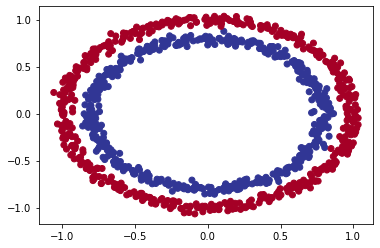

In [9]:
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [10]:
# convert numpy array to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

### Prepare for training

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

Almost all PyTorch models are subclasses of nn.Module, therefore we can directly define a subclass.
+ Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
+ Defines a forward() method containing the forward pass computation of the model.

https://playground.tensorflow.org/

In [12]:
from torch import nn
class CircleModelV(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=2, out_features=10)  # takes in 2 features (X), produces 10 features
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # takes in 10 features (X), produces 10 features
        self.layer_3 = nn.Linear(in_features=10, out_features=1)  # takes in 2 features (X), produces 1 features
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # Intersperse the ReLU activation function between layers
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0 = CircleModelV().to(device)
model_0

CircleModelV(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [13]:
# The sequential order features without non-linearity
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [14]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0359],
        [-0.1052],
        [ 0.0172],
        [-0.0773],
        [ 0.0281],
        [-0.0077],
        [-0.1326],
        [-0.1144],
        [ 0.0162],
        [-0.1101]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### Loss function
a criterion that measures the Binary Cross Entropy between the target and the input probabilities
$$
l_n=-w_n\left[y_n \cdot \log x_n+\left(1-y_n\right) \cdot \log \left(1-x_n\right)\right]
$$

In [15]:
loss_fn = nn.BCEWithLogitsLoss()

#### SGD optimizer
stochastic gradient descent : https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [16]:
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

#### classification metrics

In [17]:
# classification metric
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

### Train model
+ Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
+ Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
+ Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
+ Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
+ Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [18]:
# Fit the nonlinear model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
        # Calculate loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69380, Accuracy: 47.75% | Test Loss: 0.69188, Test Accuracy: 52.00%
Epoch: 100 | Loss: 0.69056, Accuracy: 50.88% | Test Loss: 0.68986, Test Accuracy: 53.00%
Epoch: 200 | Loss: 0.68822, Accuracy: 56.00% | Test Loss: 0.68882, Test Accuracy: 54.00%
Epoch: 300 | Loss: 0.68539, Accuracy: 54.62% | Test Loss: 0.68756, Test Accuracy: 52.50%
Epoch: 400 | Loss: 0.68176, Accuracy: 56.62% | Test Loss: 0.68594, Test Accuracy: 52.00%
Epoch: 500 | Loss: 0.67702, Accuracy: 59.13% | Test Loss: 0.68356, Test Accuracy: 57.00%
Epoch: 600 | Loss: 0.67057, Accuracy: 61.25% | Test Loss: 0.67997, Test Accuracy: 56.50%
Epoch: 700 | Loss: 0.66096, Accuracy: 64.50% | Test Loss: 0.67396, Test Accuracy: 56.50%
Epoch: 800 | Loss: 0.64390, Accuracy: 70.62% | Test Loss: 0.66023, Test Accuracy: 63.50%
Epoch: 900 | Loss: 0.60892, Accuracy: 80.00% | Test Loss: 0.62920, Test Accuracy: 72.00%


In [19]:
model_0.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_0(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 1., 0., 0., 0., 1., 0.], device='mps:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [20]:
# Fit the linear model
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backwards
    loss.backward()

    # Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 100 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 200 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 300 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 400 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 500 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 600 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 700 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 800 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%
Epoch: 900 | Loss: 0.69772, Accuracy: 45.62% | Test loss: 0.69626, Test acc: 48.50%


In [21]:
model_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='mps:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

# Numerical Method
reference: https://github.com/cantaro86/Financial-Models-Numerical-Methods

In [52]:
import scipy as sp
from scipy.optimize import minimize

## Normal Distribution
$$
N(0,1)
$$
Probability Density Function:
$$
f(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \pi^2}} .
$$

In [26]:
# standard normal distribution
np.random.standard_normal()

0.3358724165010198

## Brownian motion (Wiener process)
+ $X_0=0$ almost surely .
+ The increments are stationary and independent.
+ It has continuous paths, but nowhere differentiable.
+ $X_t-X_s \sim \mathcal{N}(0, t-s)$ for $t \geq s \geq 0$.

In [55]:
np.random.seed(seed=5000)
mu = 0.1
sigma = 0.2
T = 100
steps = 1000
paths = 4000

T_vec, dt = np.linspace(0, T, steps, retstep=True)
X0 = np.zeros((paths, 1))

increments = np.random.normal(mu*dt, sigma*np.sqrt(dt), (paths, steps-1))
X = np.concatenate((X0, increments), axis=1).cumsum(1)

Each increments is:

$$
X_{t_{\mathrm{i}}+\Delta t}-X_{t_i}=\Delta X_i \sim \mathcal{N}\left(\mu \Delta t, \sigma^2 \Delta t\right)
$$


The process at time T is given by $X_T=\sum_i \Delta X_i$ and follows the distribution:

$$
X_T \sim \mathcal{N}\left(\mu T, \sigma^2 T\right)
$$

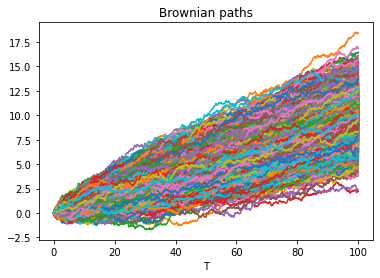

In [56]:
plt.plot(T_vec, X.T)
plt.title("Brownian paths")
plt.xlabel("T")
plt.show()

$$
\text { We expect the mean} E\left[X_T\right]=\mu T \text { and the variance  } ~ V\left[X_T\right]=\sigma^2 T.
$$

In [57]:
X_end = X[:, -1]
print("Expectation of X at time T: {:.4f}".format(X_end.mean()))
print("Standard Deviation of X at time T: {:.4f}".format(X_end.std(ddof=1)))

Expectation of X at time T: 10.0389
Standard Deviation of X at time T: 2.0196


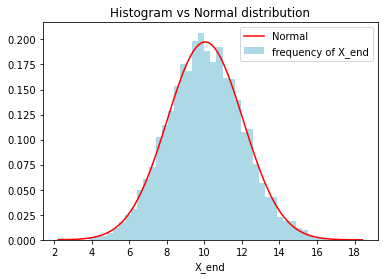

In [65]:
x = np.linspace(X_end.min(), X_end.max(), 100)
param = sp.stats.norm.fit(X_end)
pdf_fitted = sp.stats.norm.pdf(x, param[0], param[1])

plt.plot(x, pdf_fitted, color="r", label="Normal")
plt.hist(X_end, density=True, bins=50, facecolor="LightBlue", label="frequency of X_end")
plt.legend()
plt.title("Histogram vs Normal distribution")
plt.xlabel("X_end")
plt.show()

## Linear System solve Differential Equations： Finite Difference Approximations
https://github.com/mandli/intro-numerical-methods/blob/master/16_ODE_BVP.ipynb

Consider an example problem:

$$
u_{x x}=f(x)
$$
with the initial conditions $u(a)=u_a$ and $u(b)=u_b$.


We want to use finite difference method to get the value of function $u$.

The second order centered difference approximation for the second derivative for a function $u(x)$ is

$$
u_{x x} \approx \frac{u\left(x_{i-1}\right)-2 u\left(x_i\right)+u\left(x_{i+1}\right)}{\Delta x^2}
$$


If we descretize the domain into $N$ points (not including the boundaries):

$$
x_i=a+\frac{b-a}{N+1} \cdot i \text { where } i=1, \ldots, N
$$

we can then write the finite difference approximation as a system of linear equations. If we take $N=5$, then

$$
\begin{aligned}
& \left(U_{x x}\right)_1 \approx \frac{U_a-2 U_1+U_2}{\Delta x^2} \\
& \left(U_{x x}\right)_2 \approx \frac{U_1-2 U_2+U_3}{\Delta x^2} \\
& \left(U_{x x}\right)_3 \approx \frac{U_2-2 U_3+U_4}{\Delta x^2} \\
& \left(U_{x x}\right)_4 \approx \frac{U_3-2 U_4+U_5}{\Delta x^2} \\
& \left(U_{x x}\right)_5 \approx \frac{U_4-2 U_5+U_b}{\Delta x^2}
\end{aligned}
$$

where we have used $U_a=u(a)$ and $U_b=u(b)$ as the boundary conditions.

Using these approximations to the derivatives we can then write the ODE as

$$
\frac{1}{\Delta x^2}\left[\begin{array}{ccccc}
-2 & 1 & & & \\
1 & -2 & 1 & & \\
& 1 & -2 & 1 & \\
& & 1 & -2 & 1 \\
& & & 1 & -2
\end{array}\right]\left[\begin{array}{l}
U_1 \\
U_2 \\
U_3 \\
U_4 \\
U_5
\end{array}\right]=\left[\begin{array}{l}
f\left(x_1\right) \\
f\left(x_2\right) \\
f\left(x_3\right) \\
f\left(x_4\right) \\
f\left(x_5\right)
\end{array}\right]
$$

__Boundary Conditions__
We can add Dirichlet boundary conditions by sending the values we know to the $b$ vector:

$$
\begin{array}{ll}
\frac{U_a-2 U_1+U_2}{\Delta x^2}=f\left(x_1\right) \Rightarrow & \frac{-2 U_1+U_2}{\Delta x^2}=f\left(x_1\right)-\frac{U_a}{\Delta x^2} \\
\frac{U_4-2 U_5+U_b}{\Delta x^2}=f\left(x_1\right) \Rightarrow & \frac{U_4-2 U_5}{\Delta x^2}=f\left(x_5\right)-\frac{U_b}{\Delta x^2}
\end{array}
$$

so that final system looks like

$$
\frac{1}{\Delta x^2}\left[\begin{array}{ccccc}
-2 & 1 & & & \\
1 & -2 & 1 & & \\
& 1 & -2 & 1 & \\
& & 1 & -2 & 1 \\
& & & 1 & -2
\end{array}\right]\left[\begin{array}{c}
U_1 \\
U_2 \\
U_3 \\
U_4 \\
U_5
\end{array}\right]=\left[\begin{array}{c}
f\left(x_1\right)-\frac{U_a}{\Delta x^2} \\
f\left(x_2\right) \\
f\left(x_3\right) \\
f\left(x_4\right) \\
f\left(x_5\right)-\frac{U_b}{\Delta x^2}
\end{array}\right]
$$


__Example__

If we want to solve the boundary value problem:

$$
u_{x x}=e^x, \quad x \in[0,1] \quad \text { with } \quad u(0)=0.0, \text { and } u(1)=3
$$

via the construction of a linear system of equations.

$$
\begin{aligned}
u_{x x} & =e^x \\
u_x & =A+e^x \\
u & =A x+B+e^x \\
u(0) & =B+1=0 \Rightarrow B=-1 \\
u(1) & =A-1+e^1=3 \Rightarrow A=4-e \\
u(x) & =(4-e) x-1+e^x
\end{aligned}
$$


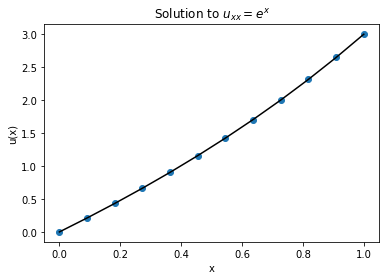

In [67]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
f = lambda x: np.exp(x)
u_true = lambda x: (4.0 - np.exp(1.0)) * x - 1.0 + np.exp(x)

# Descretization
N = 10
x_bc = np.linspace(a, b, N + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (N + 1)

# Construct matrix A
A = np.zeros((N, N))
diagonal = np.ones(N) / delta_x**2
A += np.diag(diagonal * -2.0, 0)
A += np.diag(diagonal[:-1], 1)
A += np.diag(diagonal[:-1], -1)

# Construct RHS
b = f(x)
b[0] -= u_a / delta_x**2
b[-1] -= u_b / delta_x**2

# Solve system
U = np.empty(N + 2)
U[0] = u_a
U[-1] = u_b
U[1:-1] = np.linalg.solve(A, b)

# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")
plt.show()